In [16]:
from world_machine_experiments import toy1d, shared
from world_machine_experiments.toy1d import Dimensions
from world_machine_experiments.toy1d import base, multiple, parameter_variation
from world_machine import WorldMachine

from hamilton import driver
from hamilton_sdk import adapters
from torch.optim import Adam, AdamW
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d = driver.Builder().with_modules(base, shared).build()


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

inputs = {"sequence_length": 1000,
                       "n_sequence": 10000,
                       "context_size": 200,
                       "state_dimensions": None,
                       "batch_size": 32,
                       "n_epoch": 1,
                       "learning_rate": 5e-3,
                       "weight_decay": 5e-4,
                       "accumulation_steps": 1,
                       "optimizer_class": AdamW,
                       "block_configuration": [Dimensions.measurement],
                       "device": device,
                       "seed":42,
                       "state_control":False
                       }

In [4]:
outputs = d.execute(["toy1d_dataloaders"], inputs=inputs)

In [5]:
dataloaders = outputs["toy1d_dataloaders"]

In [6]:
train_dataloader = dataloaders["train"]

In [7]:
item = next(iter(train_dataloader))

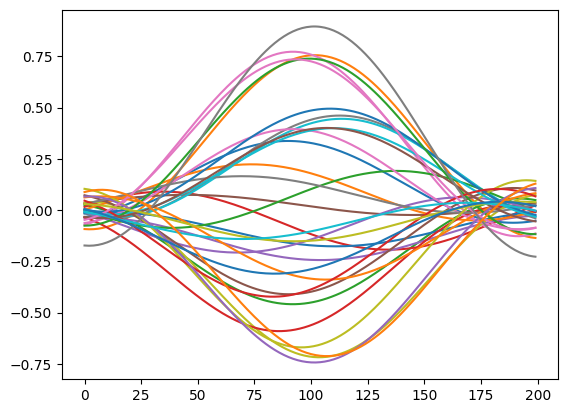

In [8]:
for i in range(32):
    plt.plot(item["inputs"][i]["state_decoded"][:,0])

In [21]:
indexes = item["index"]

In [9]:
batch_size = 32
state_size = 6

In [10]:
batch_states = (2*torch.rand((batch_size, state_size)))-1

batch_states.mean(), batch_states.min(), batch_states.max()

(tensor(0.0091), tensor(-0.9900), tensor(0.9914))

In [11]:
train_dataloader.dataset.set_state(indexes, batch_states)

In [12]:
item2 = next(iter(train_dataloader))

In [16]:
item2["inputs"].keys()

_StringKeys(dict_keys(['state_control', 'measurement', 'state_decoded', 'state']))

In [15]:
item2["inputs"]["state"]

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0

In [17]:
indexes

tensor([22876,  7243,  8040, 13982, 23228, 18089, 14518,  3776, 14786, 22096,
        19200, 11418, 19263, 20348, 12233,    55,  1367, 14294, 12115,  5852,
        21413, 20831,  2297, 16019, 14453, 12269,  3237,  3847, 20452,  7353,
         9925,  3991])

In [23]:
train_dataloader.dataset._states[22876]

MemoryMappedTensor([-0.7108,  0.1336, -0.1878, -0.6996,  0.1250,  0.4504])

In [25]:
batch_states[0]

tensor([-0.7108,  0.1336, -0.1878, -0.6996,  0.1250,  0.4504])

In [28]:
item2["index"]

tensor([ 3522,  9965, 19892, 14921, 11517, 17610, 18371, 23597, 13208, 20075,
           35,  8690, 12819,  5944, 13524, 21641, 22508, 19405, 17466, 23393,
        15869,  1520,   391, 11257, 14463,   991,  1138, 22727, 22192, 17858,
        11502, 20961])

In [29]:
for item in train_dataloader:
    indexes = item["index"]
    batch_states = (2*torch.rand((batch_size, state_size)))-1

    train_dataloader.dataset.set_state(indexes, batch_states)

In [30]:
item = next(iter(train_dataloader))

In [31]:
item["inputs"]["state"]

tensor([[ 0.5957,  0.5408,  0.8882, -0.8650, -0.3153, -0.4010],
        [ 0.0241,  0.0150,  0.6261,  0.9331, -0.9628, -0.2225],
        [ 0.3527, -0.6389, -0.8571, -0.7742, -0.0969, -0.1612],
        [ 0.6118, -0.3580,  0.5240, -0.7894,  0.5631, -0.6079],
        [-0.4831, -0.4386,  0.1187, -0.1671,  0.5808,  0.4465],
        [-0.1034,  0.7436,  0.0740, -0.2914,  0.0327, -0.9536],
        [ 0.6351,  0.9139, -0.2488,  0.7761, -0.0632, -0.8435],
        [ 0.2967, -0.7479, -0.3103, -0.0396,  0.0923, -0.5690],
        [-0.1168,  0.9047, -0.6925, -0.6260,  0.3274,  0.7417],
        [ 0.9631,  0.0244,  0.3748,  0.9841,  0.0324,  0.8655],
        [-0.6932,  0.1121, -0.0105,  0.7487, -0.3034,  0.7554],
        [ 0.6970, -0.5280,  0.7739, -0.6239,  0.9228,  0.5593],
        [ 0.1176, -0.0925, -0.9888, -0.6006,  0.9595,  0.1758],
        [ 0.7702,  0.1286,  0.9248,  0.9596,  0.7417,  0.3671],
        [-0.9877,  0.4051, -0.7121,  0.7214,  0.6995,  0.3207],
        [ 0.1853, -0.0551, -0.0117,  0.6

In [36]:
state = torch.linspace(0, 10, 11)
state

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [60]:
state_next = torch.empty((11, 2))
state_next[:] = torch.linspace(1, 11, 11).unsqueeze(-1)

state_next

tensor([[ 1.,  1.],
        [ 2.,  2.],
        [ 3.,  3.],
        [ 4.,  4.],
        [ 5.,  5.],
        [ 6.,  6.],
        [ 7.,  7.],
        [ 8.,  8.],
        [ 9.,  9.],
        [10., 10.],
        [11., 11.]])

In [61]:
torch.roll(state_next, 1, 0)

tensor([[11., 11.],
        [ 1.,  1.],
        [ 2.,  2.],
        [ 3.,  3.],
        [ 4.,  4.],
        [ 5.,  5.],
        [ 6.,  6.],
        [ 7.,  7.],
        [ 8.,  8.],
        [ 9.,  9.],
        [10., 10.]])

In [44]:
import numpy as np

np.std([[1], [2]], axis=1)

array([0., 0.])

In [65]:
stable_state_epochs = 1
for batch_index in range(5):
    print((batch_index % stable_state_epochs == 0))

True
True
True
True
True


In [10]:
stade_decoded = item["inputs"]["state_decoded"]

In [14]:
stade_decoded

tensor([[[-0.0335, -0.0213,  0.0133],
         [-0.0352, -0.0193,  0.0133],
         [-0.0366, -0.0173,  0.0133],
         ...,
         [-0.0505, -0.0269,  0.0133],
         [-0.0527, -0.0247,  0.0133],
         [-0.0547, -0.0226,  0.0133]],

        [[-0.1300, -0.0233,  0.0192],
         [-0.1318, -0.0198,  0.0192],
         [-0.1333, -0.0162,  0.0192],
         ...,
         [-0.1624, -0.0320,  0.0192],
         [-0.1651, -0.0282,  0.0192],
         [-0.1675, -0.0243,  0.0192]],

        [[-0.0095, -0.0106, -0.0397],
         [-0.0104, -0.0141, -0.0397],
         [-0.0116, -0.0177, -0.0397],
         ...,
         [ 0.0283, -0.0046, -0.0397],
         [ 0.0280, -0.0085, -0.0397],
         [ 0.0273, -0.0124, -0.0397]],

        ...,

        [[-0.0244, -0.0138,  0.0267],
         [-0.0253, -0.0106,  0.0267],
         [-0.0258, -0.0073,  0.0267],
         ...,
         [-0.0557, -0.0210,  0.0267],
         [-0.0572, -0.0174,  0.0267],
         [-0.0585, -0.0139,  0.0267]],

        [[

In [24]:
measurement = np.roll(stade_decoded, shift=-1, axis=1)

In [25]:
stade_decoded[0][0], stade_decoded[0][1]

(tensor([-0.0335, -0.0213,  0.0133]), tensor([-0.0352, -0.0193,  0.0133]))

In [26]:
measurement[0][0], measurement[0][1]

(array([-0.03515005, -0.01933663,  0.01333791], dtype=float32),
 array([-0.03663869, -0.01732706,  0.01333791], dtype=float32))

In [28]:
measurement = np.roll(stade_decoded, shift=-1, axis=0)

stade_decoded[0][1], measurement[0][0]

(tensor([-0.0352, -0.0193,  0.0133]),
 array([-0.12996502, -0.02329545,  0.01915804], dtype=float32))